In [15]:
import glob
import json
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
import seaborn as sns


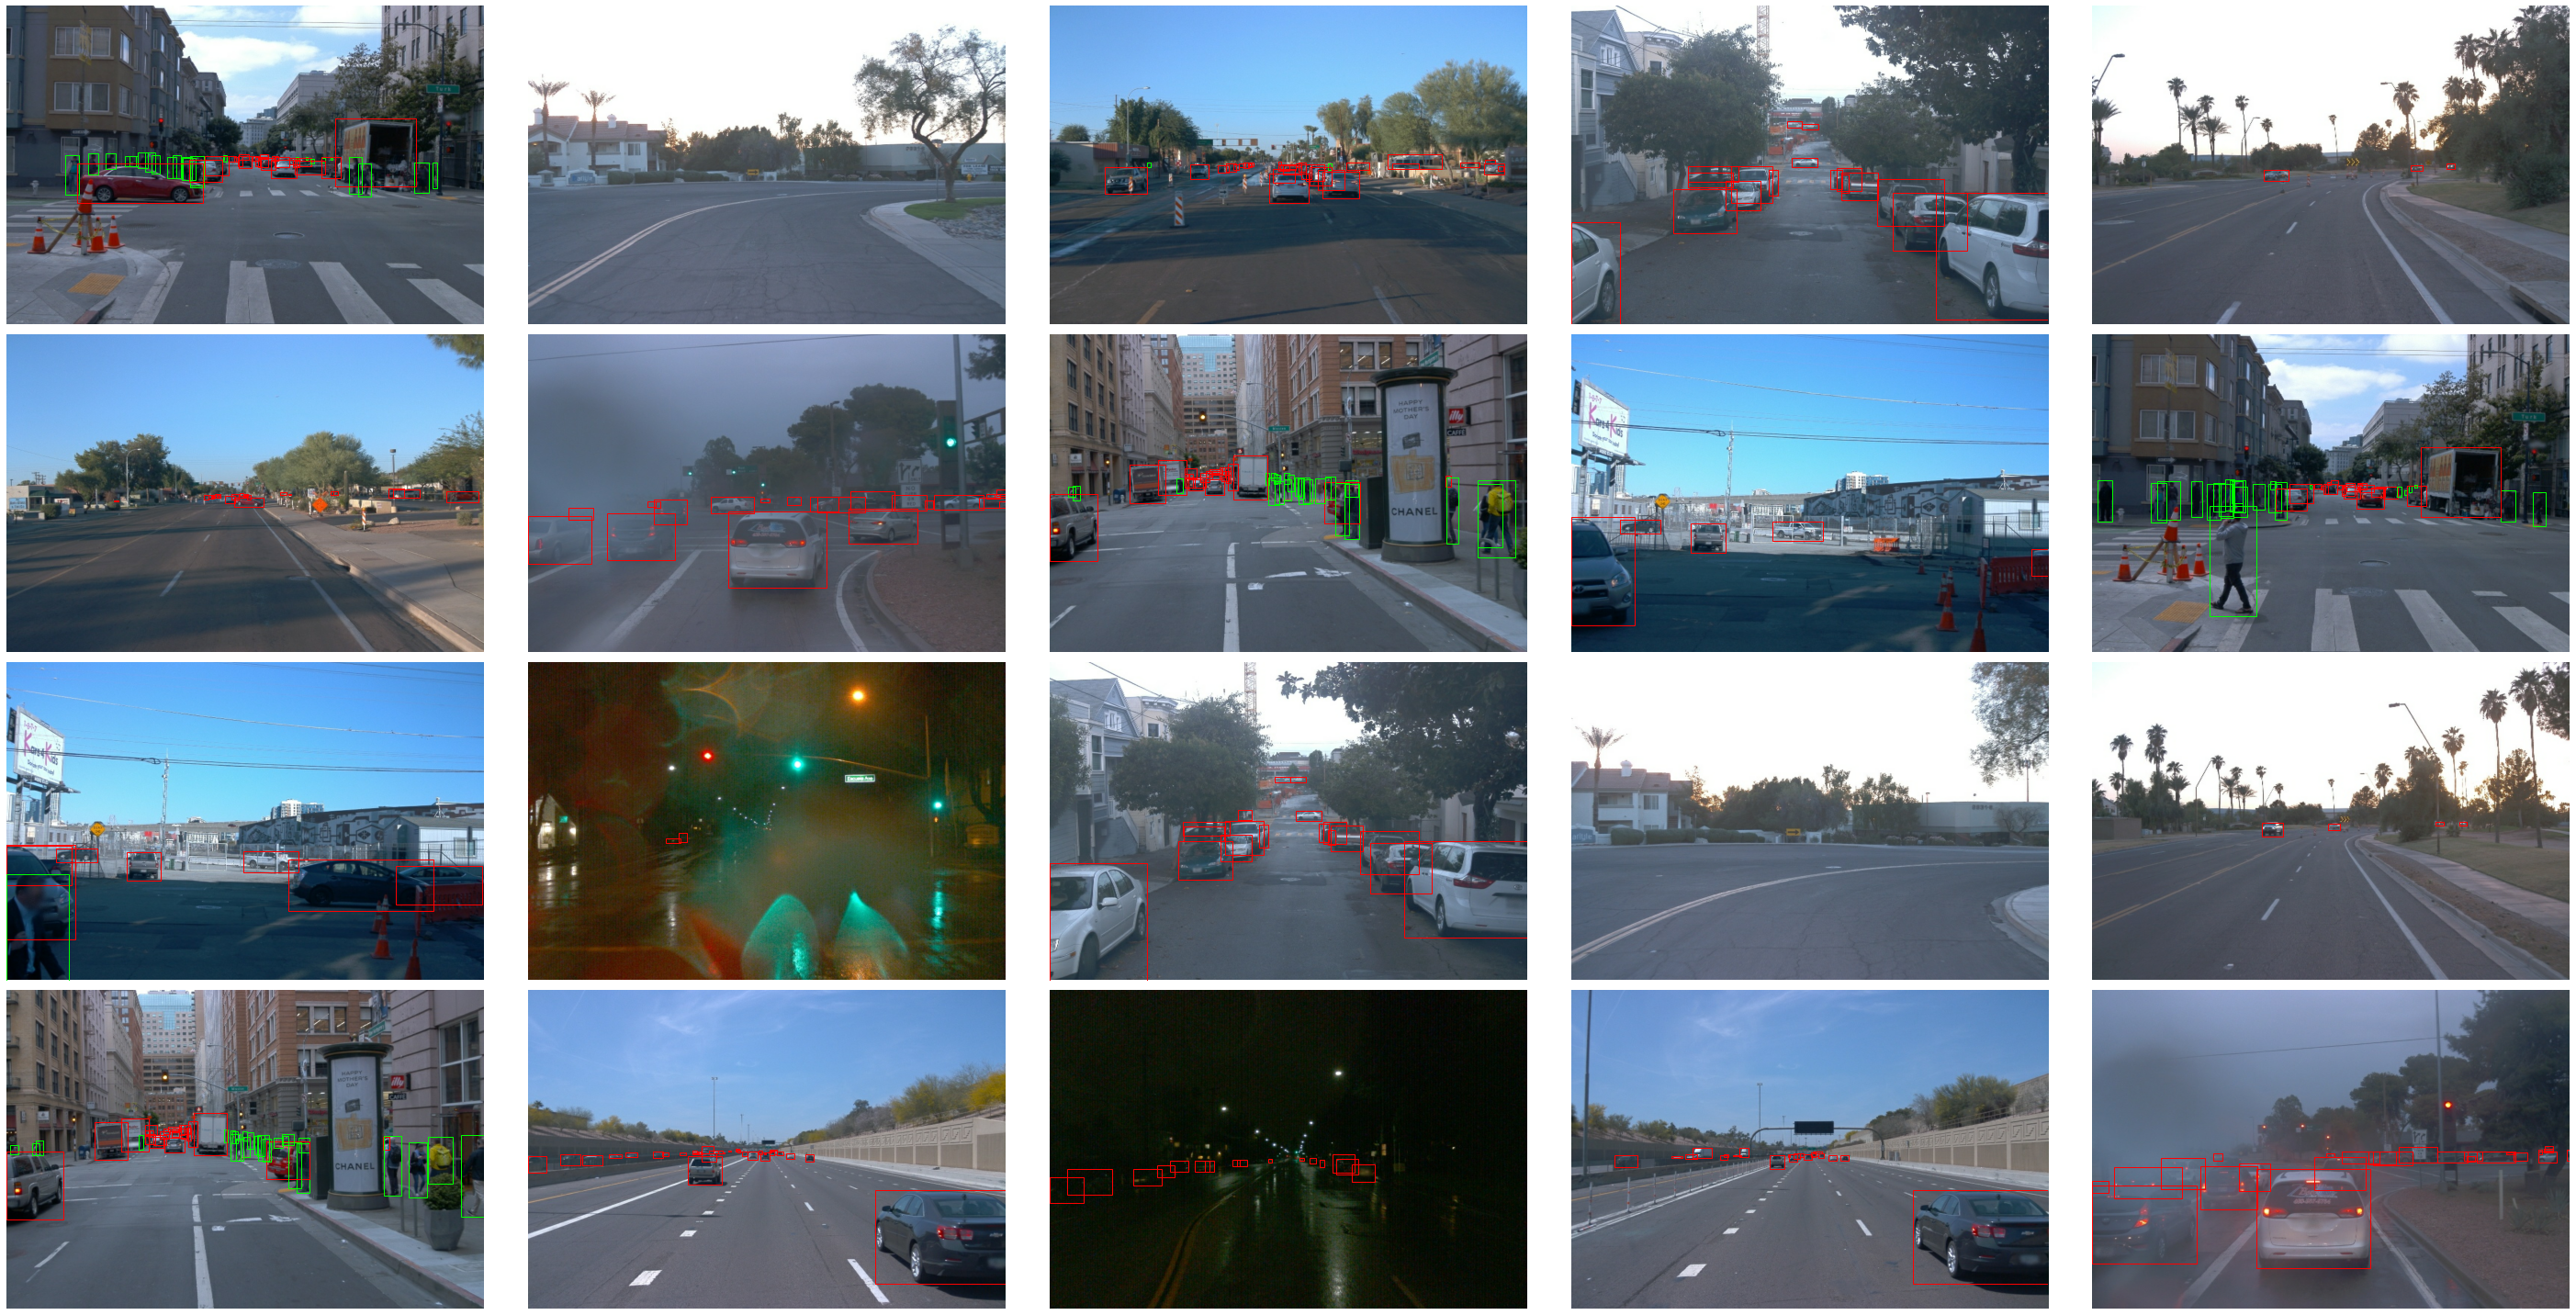

In [18]:

def get_data():

    with open('//Users//omniaelmenshawy//Desktop//self//data///ground_truth.json') as f:
        ground_truth = json.load(f)
    
    with open('//Users//omniaelmenshawy//Desktop//self//data///predictions.json') as f:
        predictions = json.load(f)

    return ground_truth, predictions


def viz(ground_truth):

    paths = glob.glob('/Users//omniaelmenshawy//Desktop//self///images/*')

    # Reformation of the Ground truth input to make the data more accessible.
    ground_dict = {}
    for gt in ground_truth:
        ground_dict[gt['filename']] =gt

    # color mapping of classes
    colormap = {1: [1, 0, 0], 2: [0, 1, 0], 4: [0, 0, 1]} 
    
    
    # creating a grid and looping over the images:
    
    f, ax = plt.subplots(4, 5, figsize=(40, 20))
    for i in range(20):
        x = i % 4
        y = i % 5

        filename = os.path.basename(paths[i])
        img = Image.open(paths[i])
        ax[x, y].imshow(img)

        bboxes = ground_dict[filename]['boxes']
        classes = ground_dict[filename]['classes']
        for cl, bb in zip(classes, bboxes):
            y1, x1, y2, x2 = bb
            rec = Rectangle((x1, y1), x2- x1, y2-y1, facecolor='none', 
                            edgecolor=colormap[cl])
            ax[x, y].add_patch(rec)
        ax[x ,y].axis('off')
    plt.tight_layout()
    plt.show()


if __name__ == "__main__": 
    ground_truth, _ = get_data()
    viz(ground_truth)